In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import time
from IPython.display import clear_output
import ipywidgets as widgets
import os

In [2]:
plt.rcParams["figure.figsize"] = (16,8)

In [9]:
dirs = [d for d in os.listdir('.') if os.path.isdir(d)]
dirs = np.sort(dirs)
wFolder = widgets.Dropdown(
    options=dict(zip(dirs,dirs)),
    description='Experiment:',
)
display(wFolder)

Dropdown(description='Experiment:', options={'secondExp_2018-07-30 10-01-10': 'secondExp_2018-07-30 10-01-10',…

In [14]:
experimentFolder = wFolder.value

In [11]:
wNodes = widgets.IntSlider()
display(wNodes)

IntSlider(value=0)

In [15]:
nodesAmount = wNodes.value

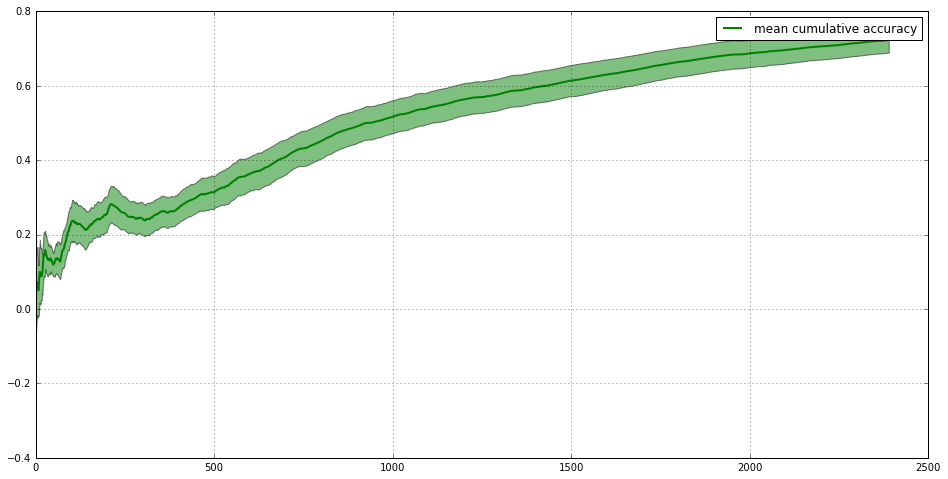

In [ ]:
files = []
correctSums = []
accuracies = []
for i in range(nodesAmount):
    files.append(open(os.path.join(experimentFolder, "worker" + str(i), "predictions.txt"), "r"))
    accuracies.append([0])
    correctSums.append([0])
t = [0]
commonStep = 0

while 1:
    for i in range(nodesAmount):
        file = files[i]
        where = file.tell()
        line = file.readline()
        if not line:
            time.sleep(1)
            file.seek(where)
        else:
            pred = [float(x) for x in line[:-1].split('\t')[1].split(',')]
            label = [float(x) for x in line[:-1].split('\t')[2].split(',')]
            correctSums[i].append(correctSums[i][-1] + int(np.argmax(pred) == np.argmax(label)))
            accuracies[i].append(correctSums[i][-1]*1.0/(commonStep+1))
    currentStep = min([len(a) for a in accuracies])
    if currentStep > commonStep:
        commonStep = currentStep
        clear_output(wait=True)
        cutAccuracies = [a[1:commonStep] for a in accuracies]
        mu = np.array(cutAccuracies).mean(axis=0)
        sigma = np.array(cutAccuracies).std(axis=0)
        fig = plt.figure()
        plt.plot(t, mu, lw=2, label='mean cumulative accuracy', color='green')
        plt.fill_between(t, mu+sigma, mu-sigma, facecolor='green', alpha=0.5)
        plt.legend()
        plt.grid()
        plt.show()
        t.append(t[-1] + 1)
        if len(t) % 100 == 0:
            fig.savefig(os.path.join(experimentFolder, 'cumulative_accuracy.png'), dpi=100)

In [8]:
for file in files:
    file.close()